In [64]:
!pip install pmdarima
!pip install statsmodels

In [65]:
import numpy as np
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
import warnings
# warnings.filterwarnings('ignore')

[Text(0.5, 0, 'Dates'), Text(0, 0.5, '%indice ultimo')]

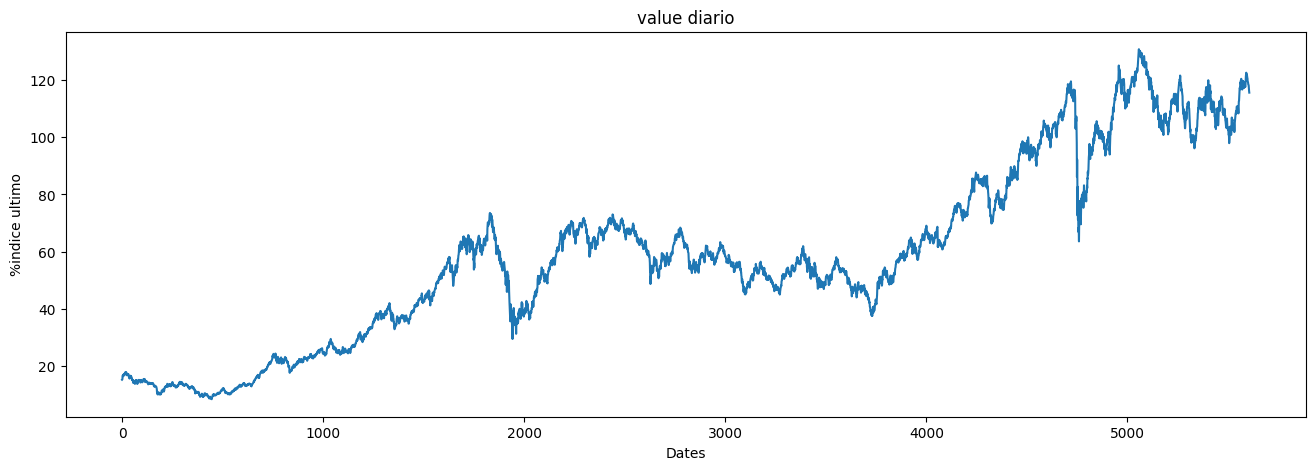

In [66]:
# Load your time series data into a DataFrame
# Assuming a column 'date' for the timestamps and 'value' for the values

import pandas as pd
# df=pd.read_excel('/home/container/t767758/zbases/ipca_202212_visao_mes.xlsx', engine='openpyxl',sheet_name="Sheet1").query("ANO >= 2010 & ANO <=
# df['ANO_MES2']=pd.to_datetime(df['ANO_MES'], format='%Y%m')
# df.index.freq='ANO_MES2 '


path = '../data/ibovespa.csv'

data = pd.read_csv(path)

# Convert 'date' column to datetime
data['date'] = pd.to_datetime(data['date'])
# data.index.freq='date'

ax=data['value'].plot(figsize=(16,5), title = "value diario")
ax.set(xlabel='Dates',ylabel='%indice ultimo')

In [67]:
data.shape

(5607, 8)

In [68]:
270000 * 1.08

291600.0

In [69]:
abs(291600.0-320169)/320169

0.08923099987818933

In [70]:
import matplotlib.pyplot as plt

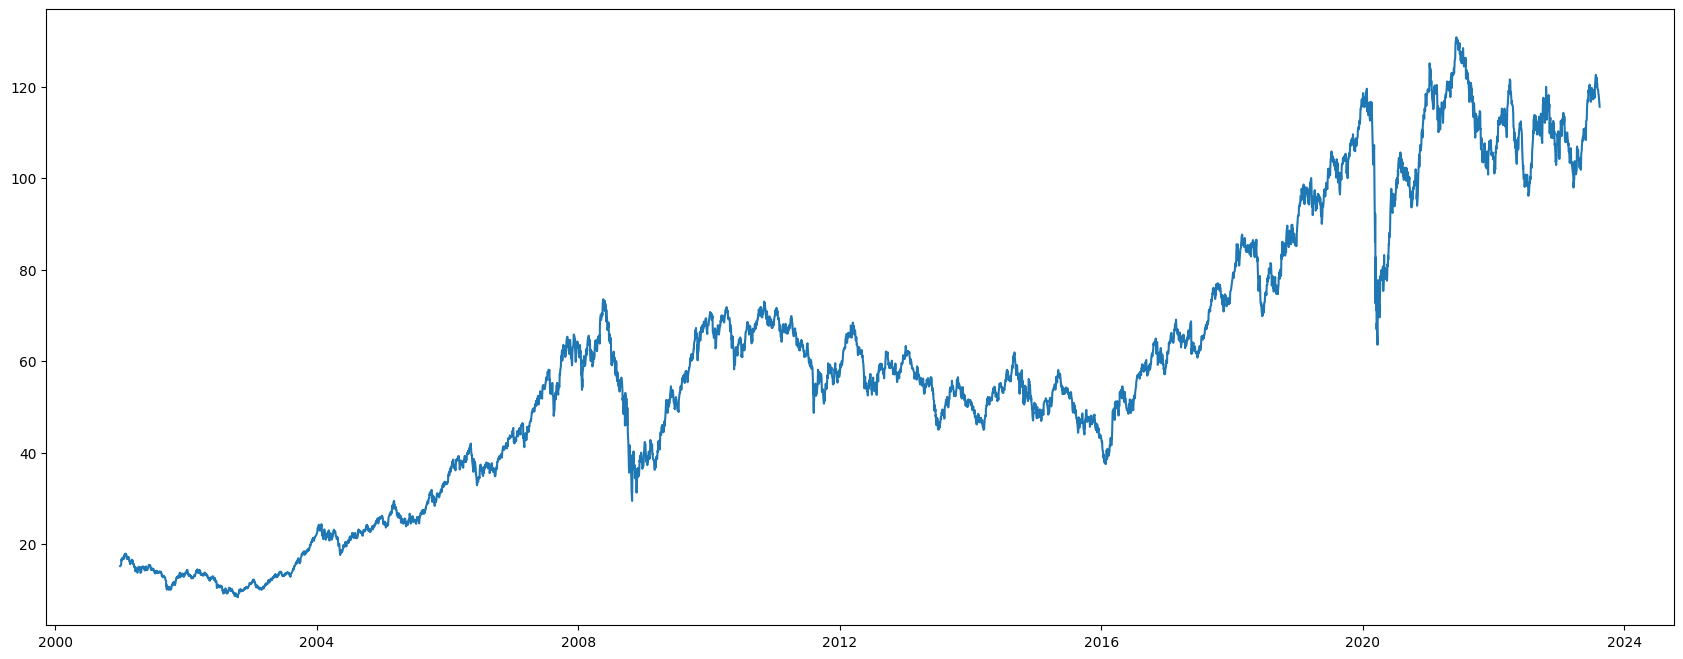

In [71]:
plt.figure(figsize = (21,8))
plt.plot(data['date'],data['value'])

In [72]:
# df.index.freq="MS"
# data.index.freq="D"

In [73]:
# # Convert 'date' column to datetime
# data['date'] = pd.to_datetime(data['date'])

# # Set 'date' column as the index
# data.set_index('date', inplace=True)

# # data.index.freq="D"

In [74]:
# # Specify the desired frequency, for example, 'D' for daily
# desired_frequency = 'D'

# # Use the asfreq() method to change the frequency
# data = data.asfreq(desired_frequency)

In [75]:
data.shape

(5607, 8)

In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5607 entries, 0 to 5606
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      5607 non-null   datetime64[ns]
 1   Último    5607 non-null   float64       
 2   Abertura  5607 non-null   float64       
 3   Máxima    5607 non-null   float64       
 4   Mínima    5607 non-null   float64       
 5   Vol.      5606 non-null   object        
 6   Var%      5607 non-null   object        
 7   value     5607 non-null   float64       
dtypes: datetime64[ns](1), float64(5), object(2)
memory usage: 350.6+ KB


a=seasonal decompose(dfTX_MES"],model="add")

In [77]:
import statsmodels.api as sm
sm.tsa.seasonal_decompose

<function statsmodels.tsa.seasonal.seasonal_decompose(x, model='additive', filt=None, period=None, two_sided=True, extrapolate_trend=0)>

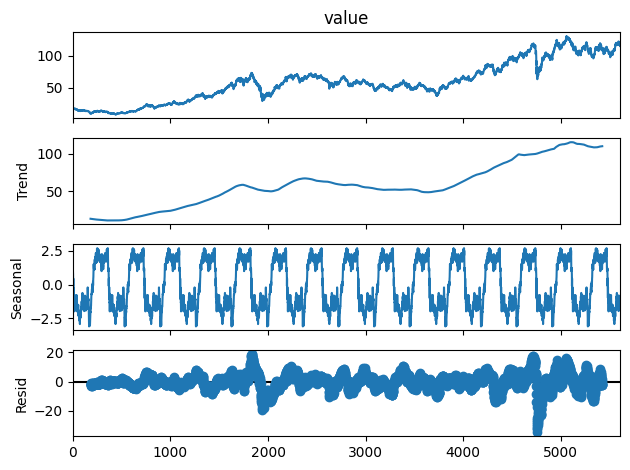

In [81]:
a=sm.tsa.seasonal_decompose(data['value'], model='additive', period=365)
_ = a.plot()

In [ ]:
#a-seasonal_decompose(x=df['TX_MES'], model="add", extrapolate_trend='freq', period=1)

In [86]:
arima_result = auto_arima(data['value'], seasonal=True,m=12, maxp=7,maxd=5,max_q=7,max_P=4,Max_D=4,max_Q=4)

In [87]:
arima_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 5607
Model:               SARIMAX(2, 1, 2)   Log Likelihood               -8107.693
Date:                Fri, 25 Aug 2023   AIC                          16225.385
Time:                        21:19:04   BIC                          16258.543
Sample:                             0   HQIC                         16236.940
                               - 5607                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.5177      0.034    -44.855      0.000      -1.584      -1.451
ar.L2         -0.7170      0.033    -21.558      0.000      -0.782      -0.652
ma.L1          1.4534      0.036     40.190      0.000       1.383       1.524
ma.L2          0.6526      0.036     18.255      0.000       0.583       0.723
sigma2         1.0561      0.007    145.244      0.000       1.042       1.070
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):             51254.75
Prob(Q):                              0.76   Prob(JB):                         0.00
Heteroskedasticity (H):               5.84   Skew:                            -0.99
Prob(H) (two-sided):                  0.00   Kurtosis:                        17.68
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: >

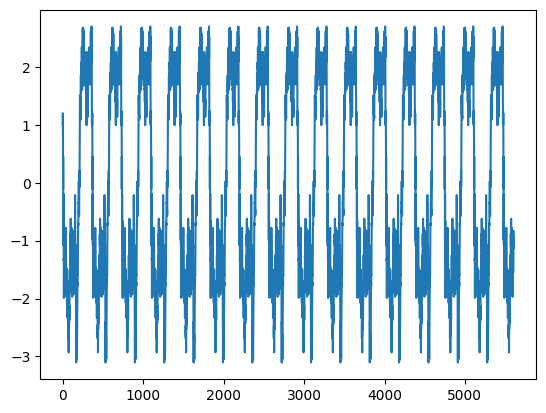

In [88]:
a.seasonal.plot()

In [89]:
arima_pred=arima_result.predict()

In [200]:
data.shape

(5607, 8)

In [201]:
dias_teste=30

In [202]:
dias_teste * 100 / 5607

0.5350454788657036

In [203]:
train_data=data[:len(data)-dias_teste]

In [204]:
test_data=data[len(data)-dias_teste:]

In [205]:
arima_model=SARIMAX(train_data['value'], order=(2,1,1), seasonal_order=(1,0,1,233))

In [206]:
arima_result=arima_model.fit()

In [207]:
arima_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                               value   No. Observations:                 5577
Model:             SARIMAX(2, 1, 1)x(1, 0, 1, 233)   Log Likelihood               -8072.060
Date:                             Fri, 25 Aug 2023   AIC                          16156.120
Time:                                     22:21:18   BIC                          16195.878
Sample:                                          0   HQIC                         16169.978
                                            - 5577                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1015      0.271     -0.375      0.708      -0.632       0.429
ar.L2          0.0179      0.021      0.842      0.400      -0.024       0.060
ma.L1          0.0306      0.270      0.113      0.910      -0.499       0.560
ar.S.L233     -0.0324      2.584     -0.013      0.990      -5.097       5.032
ma.S.L233      0.0374      2.583      0.014      0.988      -5.026       5.100
sigma2         1.0590      0.008    133.862      0.000       1.044       1.075
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             55134.30
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               5.99   Skew:                            -1.04
Prob(H) (two-sided):                  0.00   Kurtosis:                        18.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [208]:
arima_pred = arima_result.predict(start=len(train_data),end=len(data) -1).rename("ARIMA Predictions")

In [209]:
test_data.loc[:,'ARIMA_Predictions']=arima_pred

C:\Users\Igor\AppData\Local\Temp\ipykernel_17168\2492267248.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data.loc[:,'ARIMA_Predictions']=arima_pred


In [210]:
test_data['ARIMA_Predictions']

5577    119.505664
5578    119.513562
5579    119.516958
5580    119.519856
5581    119.529960
5582    119.533029
5583    119.542813
5584    119.543942
5585    119.552336
5586    119.549716
5587    119.564722
5588    119.566871
5589    119.568892
5590    119.570076
5591    119.570211
5592    119.558695
5593    119.553959
5594    119.565933
5595    119.566576
5596    119.570235
5597    119.563826
5598    119.563574
5599    119.553819
5600    119.549437
5601    119.553772
5602    119.556705
5603    119.563209
5604    119.551078
5605    119.551487
5606    119.563831
Name: ARIMA_Predictions, dtype: float64

<Axes: >

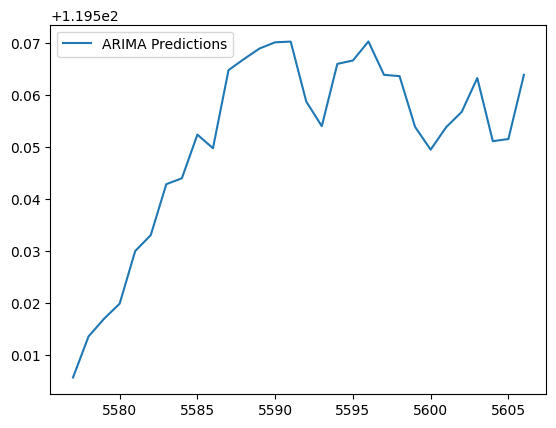

In [211]:
arima_pred.plot(legend=True)

In [212]:
arima_pred = arima_result.predict(start=len(train_data), end = len(data)-1).rename("ARIMA_Predictions")

In [213]:
test_data['value'].sum()

3570.1369999999997

In [214]:
arima_pred.sum()

3586.5347426813782

In [216]:
arima_rmse_error = rmse(test_data['value'], arima_pred)
arima_mse_error = arima_rmse_error**2
mean_value = data['value'].mean()
print (f'MSE Error: {arima_mse_error}\nRMSE error:{arima_rmse_error}\nMean: {mean_value}')

TypeError: 'float' object is not callable

7 dias

* MSE Error: 4.724435982707407
* RMSE error:2.1735767717537393
* Mean: 58.82957160691992

30 dias e s=233

* MSE: 3.3479287293555418
* RMSE: 1.8297346062627613
* MAE: 1.5655731676467657
* MAPE: 1.3193684888820871

30 dias

* MSE Error: 3.200510354398293
* RMSE error:1.7889970247035887
* Mean: 58.82957160691992

10 anos
* MSE Error: 1737.4217898333964
* RMSE error:41.68239184395968
* Mean: 58.82957160691992

In [217]:
test_data.loc[:,"ARIMA_Predictions"] = arima_pred

In [218]:
test_data[['value','ARIMA_Predictions']]

,value,ARIMA_Predictions
5577,117.426,119.505664
5578,118.898,119.513562
5579,117.942,119.516958
5580,117.220,119.519856
5581,117.666,119.529960
5582,119.264,119.533029
5583,117.711,119.542813
5584,118.219,119.543942
5585,117.841,119.552336
5586,117.552,119.549716


<Axes: >

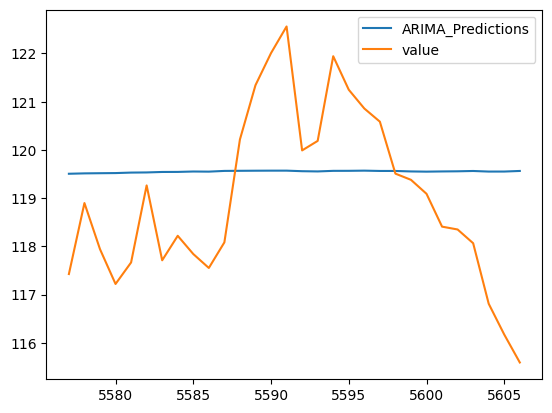

In [219]:
arima_pred.plot(legend=True)
test_data['value'].plot(legend=True)
# data['value'].plot(legend=True)

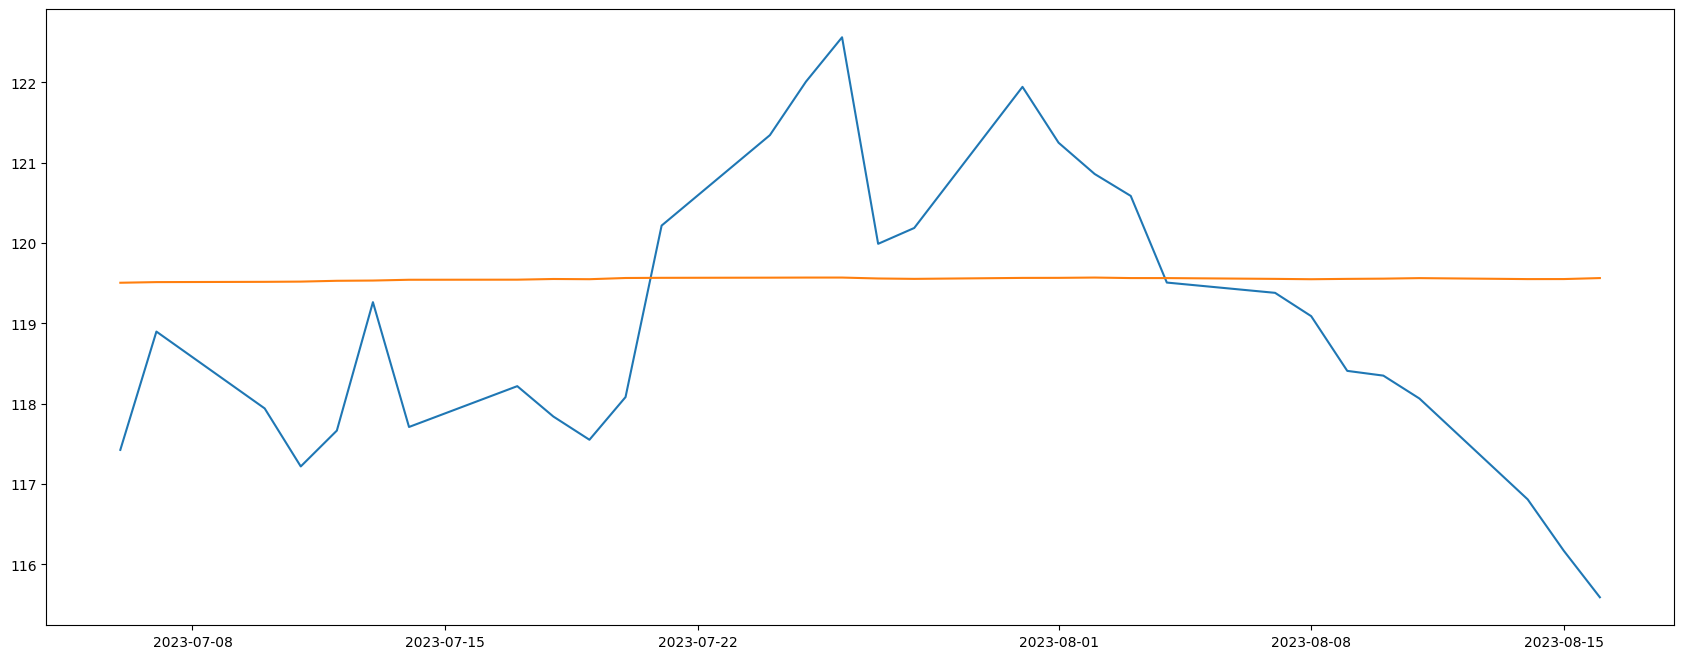

In [220]:
plt.figure(figsize = (21,8))
_ = plt.plot(test_data['date'],test_data[['value', 'ARIMA_Predictions']])

In [221]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

# Evaluate the forecast performance
# Handle missing values in actual data
actual = test_data["value"].values  # Use the last 'forecast_steps' actual values
actual = np.nan_to_num(actual)  # Replace NaN with 0, you can choose a different strategy if needed
predicted = test_data["ARIMA_Predictions"]  # Forecasted values

mae = mean_absolute_error(actual, test_data["ARIMA_Predictions"])
mse = mean_squared_error(actual, test_data["ARIMA_Predictions"])
rmse = math.sqrt(mse)
epsilon = 1e-10  # Small constant to prevent division by zero
mape = np.mean(np.abs(test_data["ARIMA_Predictions"] - actual) / (np.abs(actual) + epsilon)) * 100


print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("MAPE:", mape)

MSE: 3.3479287293555418
RMSE: 1.8297346062627613
MAE: 1.5655731676467657
MAPE: 1.3193684888820871


30 dias e s=233

* MSE: 3.3479287293555418
* RMSE: 1.8297346062627613
* MAE: 1.5655731676467657
* MAPE: 1.3193684888820871

7 dias

* MSE Error: 4.724435982707407
* RMSE error:2.1735767717537393
* Mean: 58.82957160691992

In [222]:
# Defina o limite de precisão (1%)
limite_precisao = 0.01  # 1%

# Calcule a diferença percentual entre as previsões e os valores reais
diferenca_percentual = abs(predicted - actual) / actual

# Calcule a acurácia (percentual de previsões dentro do limite)
acuracia = (diferenca_percentual <= limite_precisao).mean() * 100

# Compare com o limiar desejado (70%)
limiar_desejado = 70

if acuracia >= limiar_desejado:
    print(f"O modelo atingiu uma acurácia de {acuracia:.2f}%, que é maior que o limiar de {limiar_desejado}%.")
else:
    print(f"O modelo não atingiu a acurácia desejada. A acurácia é de {acuracia:.2f}%.")


O modelo não atingiu a acurácia desejada. A acurácia é de 33.33%.


In [223]:
# Calcule a acurácia (percentual de previsões corretas)
acuracia = (predicted == actual).mean() * 100

# Compare com o limiar desejado (70%)
limiar_desejado = 70

if acuracia >= limiar_desejado:
    print(f"O modelo atingiu uma acurácia de {acuracia:.2f}%, que é maior que o limiar de {limiar_desejado}%.")
else:
    print(f"O modelo não atingiu a acurácia desejada. A acurácia é de {acuracia:.2f}%.")


O modelo não atingiu a acurácia desejada. A acurácia é de 0.00%.


In [224]:
from sklearn.metrics import mean_absolute_error

# Calcule o MAE entre as previsões (predicted) e os valores reais (actual)
mae = mean_absolute_error(actual, predicted)

print(f"O Erro Absoluto Médio (MAE) é: {mae:.2f}")


O Erro Absoluto Médio (MAE) é: 1.57


Esse código em Python parece ser um script que avalia a acurácia de um modelo de previsão em relação a um limite de precisão especificado (1% neste caso) e compara essa acurácia com um limiar desejado (70% neste caso). Vou explicar cada parte do código em detalhes:

1. `limite_precisao = 0.01`: Aqui, você define o limite de precisão como 0.01, que representa 1%. Este valor é usado para determinar se as previsões do modelo estão dentro do limite desejado de precisão.

2. `diferenca_percentual = abs(predicted - actual) / actual`: Nesta linha, você calcula a diferença percentual entre as previsões do modelo (variável `predicted`) e os valores reais (variável `actual`). A diferença percentual é calculada como a diferença absoluta entre as previsões e os valores reais dividida pelo valor real. Isso permite medir o erro relativo das previsões em relação aos valores reais.

3. `acuracia = (diferenca_percentual <= limite_precisao).mean() * 100`: Aqui, você calcula a acurácia do modelo. A acurácia é definida como a porcentagem de previsões que estão dentro do limite de precisão especificado (`limite_precisao`). Primeiro, a expressão `(diferenca_percentual <= limite_precisao)` cria uma matriz de valores booleanos, onde cada valor é `True` se a diferença percentual estiver dentro do limite de precisão e `False` caso contrário. Em seguida, `.mean()` é usado para calcular a média desses valores booleanos, que é a fração de previsões dentro do limite de precisão. Finalmente, multiplicamos por 100 para obter a acurácia em porcentagem.

4. `limiar_desejado = 70`: Você define um limiar desejado de 70%, que é o valor mínimo de acurácia que você deseja que o modelo alcance.

5. A estrutura condicional `if acuracia >= limiar_desejado:` verifica se a acurácia calculada é maior ou igual ao limiar desejado. Se a acurácia for maior ou igual a 70%, o código imprimirá uma mensagem indicando que o modelo atingiu a acurácia desejada. Caso contrário, imprimirá uma mensagem informando que o modelo não atingiu a acurácia desejada e mostrará a acurácia atual.

Em resumo, esse código calcula a acurácia de um modelo de previsão em relação a um limite de precisão e informa se a acurácia atingiu ou não o limiar desejado. A acurácia é uma medida de quão bem as previsões do modelo estão de acordo com os valores reais, com base no limite de precisão especificado.